In [1]:
import pandas as pd
import statsmodels.api as sm
import warnings
import datetime
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [9]:
PATH = ''

# Connect to Google Drive

In [3]:
#install python 3.10
!sudo apt-get update -y
!sudo apt-get install python3.10

#change alternatives
!sudo update-alternatives --install /usr/bin/python3 python3 /usr/bin/python3.7 1
!sudo update-alternatives --install /usr/bin/python3 python3 /usr/bin/python3.10 2


Hit:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:5 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:6 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:7 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:8 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:9 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:11 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:13 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Get:14 http://ppa.launchpad.net

In [4]:
! python --version

Python 3.10.4


In [10]:
from google.colab import drive
PATH = '/content/drive/'
print(PATH)
drive.mount(PATH)

/content/drive/
Mounted at /content/drive/


In [11]:
PATH += 'MyDrive/key_event_data/'

# Read Combined data

In [12]:
df = pd.read_csv(PATH+'combined_df.csv')
df

,gvkey,datadate,fyearq,fqtr,indfmt,consol,popsrc,datafmt,curcdq,datacqtr,...,neg_Annual General Meeting,neg_Ex-Div Date (Regular),neg_Board Meeting,neg_M&A Transaction Announcements,neg_M&A Transaction Closings,neg_Private Placements,neg_Fixed Income Offerings,neg_Special/Extraordinary Shareholders Meeting,neg_Conferences,neg_Buyback Tranche Update
0,1004,08/31/2001,2001,1,INDL,C,D,STD,USD,2001Q3,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1004,11/30/2001,2001,2,INDL,C,D,STD,USD,2001Q4,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1004,02/28/2002,2001,3,INDL,C,D,STD,USD,2002Q1,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1004,05/31/2002,2001,4,INDL,C,D,STD,USD,2002Q2,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1004,08/31/2002,2002,1,INDL,C,D,STD,USD,2002Q3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262372,332115,12/31/2020,2020,4,INDL,C,D,STD,USD,2020Q4,...,NaN,NaN,NaN,NaN,NaN,0.027125,NaN,0.0,0.0,NaN
262373,335466,03/31/2020,2020,1,INDL,C,D,STD,USD,2020Q1,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
262374,339965,10/31/2020,2020,3,INDL,C,D,STD,USD,2020Q3,...,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,0.0,NaN
262375,339965,01/31/2021,2020,4,INDL,C,D,STD,USD,2020Q4,...,NaN,NaN,NaN,NaN,0.010375,NaN,NaN,NaN,0.0,NaN


In [13]:
df.drop(['indfmt','consol','popsrc','datafmt','curcdq'],axis=1,inplace=True)

In [14]:
df.columns

Index(['gvkey', 'datadate', 'fyearq', 'fqtr', 'datacqtr', 'datafqtr', 'fdateq',
       'actq', 'atq', 'chq', 'cogsq', 'cshoq', 'dlcq', 'dlttq', 'dpq', 'drcq',
       'intaccq', 'invtq', 'lctq', 'ltq', 'nimq', 'niq', 'npatq', 'oiadpq',
       'oibdpq', 'opepsq', 'req', 'revtq', 'saleq', 'txdiq', 'txpq', 'txtq',
       'uinvq', 'wcapq', 'xaccq', 'costat', 'gind', 'gsector', 'quarter',
       'pos_Executive/Board Changes - Other', 'pos_Client Announcements',
       'pos_Announcements of Earnings',
       'pos_Corporate Guidance - New/Confirmed', 'pos_Business Expansions',
       'pos_Product-Related Announcements', 'pos_Dividend Affirmations',
       'pos_Dividend Increases', 'pos_Earnings Calls',
       'pos_Company Conference Presentations', 'pos_Earnings Release Date',
       'pos_Annual General Meeting', 'pos_Ex-Div Date (Regular)',
       'pos_Board Meeting', 'pos_M&A Transaction Announcements',
       'pos_M&A Transaction Closings', 'pos_Private Placements',
       'pos_Fixed Income

In [15]:
df['niq'].isna().sum()/ len(df)

0.1085194205284762

In [16]:
#drop missing values in the NI column
df.dropna(subset = ['niq'],inplace=True)

#fill missing values in the sentiment columns with 0 (or neutral sentiment)
df.iloc[:,39:] = df.iloc[:,39:].fillna(0)

In [17]:
len(df)

233904

In [18]:
df.dropna(how='all',inplace=True)
drop_cols = []
for i in df:
    if(df[i].isna().sum()/len(df) >0.1):
        drop_cols.append(i)

df.drop(drop_cols,axis=1,inplace=True)

In [19]:
df.columns

Index(['gvkey', 'datadate', 'fyearq', 'fqtr', 'datacqtr', 'datafqtr', 'atq',
       'cogsq', 'cshoq', 'dlcq', 'dlttq', 'invtq', 'ltq', 'niq', 'oiadpq',
       'oibdpq', 'opepsq', 'req', 'revtq', 'saleq', 'txtq', 'costat', 'gind',
       'gsector', 'quarter', 'pos_Executive/Board Changes - Other',
       'pos_Client Announcements', 'pos_Announcements of Earnings',
       'pos_Corporate Guidance - New/Confirmed', 'pos_Business Expansions',
       'pos_Product-Related Announcements', 'pos_Dividend Affirmations',
       'pos_Dividend Increases', 'pos_Earnings Calls',
       'pos_Company Conference Presentations', 'pos_Earnings Release Date',
       'pos_Annual General Meeting', 'pos_Ex-Div Date (Regular)',
       'pos_Board Meeting', 'pos_M&A Transaction Announcements',
       'pos_M&A Transaction Closings', 'pos_Private Placements',
       'pos_Fixed Income Offerings',
       'pos_Special/Extraordinary Shareholders Meeting', 'pos_Conferences',
       'pos_Buyback Tranche Update', 'neg_Exe

In [20]:
#adding the shifted eps (next quarter eps)
shifted = df.groupby('gvkey',as_index=False)['niq'].shift(-1)
shifted.reset_index(inplace=True)
df.reset_index(inplace=True)
df = df.merge(shifted, on='index', suffixes =['','_shifted'])
df.dropna(subset=['niq_shifted'],inplace=True)

In [21]:
#adding change_eps and direction_change cols
df['change_niq'] = df['niq_shifted'] - df['niq']
df['dir'] = df['change_niq'].apply(lambda x: 0 if x < 0 else 1)
df.drop('niq_shifted',axis=1,inplace=True)

In [22]:
#dropping columns we will not use in prediction
df.drop(['fyearq','fqtr','datacqtr','datafqtr','gind','gsector','quarter','costat'],axis=1,inplace=True)

In [23]:
#adding percent change columns (from previous year values) for our predictors
predictors = list(df.columns[3:18])
temp = df.groupby('gvkey').shift(1)[predictors].reset_index()
df = df.merge(temp, on='index', suffixes=['','_shifted'])
df.dropna(how='all',inplace=True)

for i in predictors:
    df[i+'_perc_change'] =  (df[i] - df[i+'_shifted'])/abs(df[i+'_shifted'])
    
new = []
for i in predictors:
    new.append(i + '_perc_change')
predictors = predictors + new

In [24]:
#running univariate regression and keeping only those columns whose tvalue is statisically significant
keep_cols = []
def run_unireg(col):
    temp = df[[col,'dir']]
    temp.replace([np.inf, -np.inf], np.nan, inplace=True)
    temp.dropna(inplace=True)
    X = sm.add_constant(temp[col])
    y = temp['dir']
    log_reg = sm.Logit(y,X).fit()
    if(log_reg.tvalues[1] >= 2 or log_reg.tvalues[1] <= -2):
        keep_cols.append(col)

for i in predictors:
    print(i)
    run_unireg(i)

atq
Optimization terminated successfully.
         Current function value: 0.691590
         Iterations 3
cogsq
Optimization terminated successfully.
         Current function value: 0.691563
         Iterations 3
cshoq
Optimization terminated successfully.
         Current function value: 0.691606
         Iterations 3
dlcq
Optimization terminated successfully.
         Current function value: 0.691673
         Iterations 3
dlttq
Optimization terminated successfully.
         Current function value: 0.691587
         Iterations 3
invtq
Optimization terminated successfully.
         Current function value: 0.691629
         Iterations 3
ltq
Optimization terminated successfully.
         Current function value: 0.691589
         Iterations 3
niq
Optimization terminated successfully.
         Current function value: 0.688978
         Iterations 5
oiadpq
Optimization terminated successfully.
         Current function value: 0.691386
         Iterations 4
oibdpq
Optimization terminated suc

In [25]:
ratios = pd.read_csv(PATH+'ratios.csv')
ratios.drop('divyield',axis=1,inplace=True)
final = ratios.merge(df, left_on = ['gvkey','qdate'], right_on = ['gvkey','datadate'])
final.drop_duplicates(subset=['gvkey','qdate'],inplace=True)
cols = ratios.columns[4:-1]
final_pred = predictors + list(cols)
final.head()

,gvkey,adate,qdate,public_date,bm,evm,pe_op_basic,pe_op_dil,pe_exi,pe_inc,...,invtq_perc_change,ltq_perc_change,niq_perc_change,oiadpq_perc_change,oibdpq_perc_change,opepsq_perc_change,req_perc_change,revtq_perc_change,saleq_perc_change,txtq_perc_change
0,1004,05/31/2001,08/31/2001,10/31/2001,0.859,9.923,10.556,10.556,12.881,12.881,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1004,05/31/2001,11/30/2001,01/31/2002,1.550,11.856,18.696,18.696,-5.375,-5.375,...,-0.219750,0.027508,-113.106996,-1.031405,-0.473398,-6.000,-0.274636,-0.286236,-0.286236,-224.277778
6,1004,05/31/2001,02/28/2002,04/30/2002,1.570,14.446,70.778,70.778,-6.813,-6.813,...,0.020781,-0.125656,0.957969,1.251462,0.037910,0.200,-0.024638,-0.009883,-0.009883,0.957977
9,1004,05/31/2002,05/31/2002,07/31/2002,0.935,22.965,-36.417,-36.417,-4.202,-4.202,...,0.056187,0.064161,-0.157642,-15.093023,-0.038273,0.000,-0.032537,0.027360,0.027360,-0.158553
12,1004,05/31/2002,08/31/2002,10/31/2002,1.682,24.601,-9.537,-9.537,-1.671,-1.671,...,-0.041352,0.041054,-0.840438,-3.976898,-0.279120,-0.875,-0.026633,0.025668,0.025668,-0.492334


In [26]:
#running univariate regression and keeping only those columns whose tvalue is statisically significant
keep_cols = []
def run_unireg(col):
    temp = final[[col,'dir']]
    temp.replace([np.inf, -np.inf], np.nan, inplace=True)
    temp.dropna(inplace=True)
    X = sm.add_constant(temp[col])
    y = temp['dir']
    log_reg = sm.Logit(y,X).fit()
    if(log_reg.tvalues[1] >= 2 or log_reg.tvalues[1] <= -2):
        keep_cols.append(col)

for i in final_pred:
    print(i)
    run_unireg(i)

atq
Optimization terminated successfully.
         Current function value: 0.691504
         Iterations 3
cogsq
Optimization terminated successfully.
         Current function value: 0.691491
         Iterations 3
cshoq
Optimization terminated successfully.
         Current function value: 0.691504
         Iterations 3
dlcq
Optimization terminated successfully.
         Current function value: 0.691592
         Iterations 3
dlttq
Optimization terminated successfully.
         Current function value: 0.691513
         Iterations 3
invtq
Optimization terminated successfully.
         Current function value: 0.691535
         Iterations 3
ltq
Optimization terminated successfully.
         Current function value: 0.691502
         Iterations 3
niq
Optimization terminated successfully.
         Current function value: 0.689615
         Iterations 5
oiadpq
Optimization terminated successfully.
         Current function value: 0.691341
         Iterations 4
oibdpq
Optimization terminated suc

In [27]:
keep_cols.remove('saleq')

In [28]:
#keeping only the statistically significant columns
data = final[['dir','public_date']+keep_cols].replace([np.inf, -np.inf], np.nan).dropna()

In [29]:
X = sm.add_constant(data.iloc[:,2:])
y = data['dir']
log_reg = sm.Logit(y,X).fit()
log_reg.summary()

Optimization terminated successfully.
         Current function value: 0.675266
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    dir   No. Observations:                34383
Model:                          Logit   Df Residuals:                    34350
Method:                           MLE   Df Model:                           32
Date:                Mon, 02 May 2022   Pseudo R-squ.:                 0.02475
Time:                        21:42:14   Log-Likelihood:                -23218.
converged:                       True   LL-Null:                       -23807.
Covariance Type:            nonrobust   LLR p-value:                3.675e-227
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.2745      0.062      4.419      0.000       0.153       0.396
cogsq              -3.547e-05   1.91e-05     -1.862      0.063   -7.28e-05    1.87e-06
niq                   -0.0015   9.88e-05    -14.881      0.000      -0.002      -0.001
oiadpq                 0.0011      0.000      9.309      0.000       0.001       0.001
oibdpq             -7.609e-05   7.07e-05     -1.076      0.282      -0.000    6.25e-05
opepsq                -0.3382      0.018    -19.096      0.000      -0.373      -0.303
revtq               3.768e-05   1.78e-05      2.116      0.034    2.78e-06    7.26e-05
invtq_perc_change   1.964e-05   7.93e-06      2.477      0.013     4.1e-06    3.52e-05
niq_perc_change    -1.367e-06   2.29e-06     -0.597      0.551   -5.86e-06    3.12e-06
opepsq_perc_change    -0.0008      0.001     -1.067      0.286      -0.002       0.001
bm                    -0.2099      0.029     -7.358      0.000      -0.266      -0.154
pe_op_basic        -6.694e-05      0.001     -0.106      0.916      -0.001       0.001
pe_op_dil             -0.0001      0.001     -0.179      0.858      -0.001       0.001
pe_exi                 0.0004      0.000      1.040      0.298      -0.000       0.001
pe_inc             -3.669e-06      0.000     -0.010      0.992      -0.001       0.001
ps                    -0.0010      0.000     -3.310      0.001      -0.002      -0.000
pcf                    0.0003      0.000      0.815      0.415      -0.000       0.001
roa                    0.1823      0.098      1.852      0.064      -0.011       0.375
cash_lt               -0.0120      0.016     -0.761      0.447      -0.043       0.019
invt_act               0.2537      0.107      2.361      0.018       0.043       0.464
rect_act               0.2426      0.087      2.792      0.005       0.072       0.413
lt_debt               -0.1636      0.067     -2.446      0.014      -0.295      -0.033
ocf_lct                0.0267      0.019      1.393      0.164      -0.011       0.064
cash_debt             -0.0197      0.028     -0.693      0.488      -0.076       0.036
debt_assets           -0.1448      0.088     -1.640      0.101      -0.318       0.028
cash_ratio            -0.0380      0.036     -1.043      0.297      -0.109       0.033
quick_ratio            0.0548      0.061      0.893      0.372      -0.066       0.175
curr_ratio            -0.0322      0.038     -0.839      0.401      -0.107       0.043
at_turn               -0.0415      0.017     -2.371      0.018      -0.076      -0.007
accrual                0.6471      0.130      4.979      0.000       0.392       0.902
ptb                    0.0138      0.002      5.747      0.000       0.009       0.019
PEG_trailing           0.0042      0.002      2.588      0.010       0.001       0.007
PEG_1yrforward        -0.0010      0.002     -0.567      0.571      -0.005       0.003
======================================================================================
"""

In [30]:
#keeping only the fields that were significant in multivariate regression
sig = log_reg.tvalues[1:].reset_index()
sig = sig[(sig[0]>=2) | (sig[0]<=-2)]
keep= list(sig['index'].values)

In [31]:
keep

['niq',
 'oiadpq',
 'opepsq',
 'revtq',
 'invtq_perc_change',
 'bm',
 'ps',
 'invt_act',
 'rect_act',
 'lt_debt',
 'at_turn',
 'accrual',
 'ptb',
 'PEG_trailing']

In [32]:
#preparing clean final data
final = final[['cusip','dir','public_date']+keep].replace([np.inf, -np.inf], np.nan).dropna()
final.sort_values('public_date',inplace=True)
final['public_date'] = pd.to_datetime(final['public_date'])
final.reset_index(drop=True,inplace=True)
final.head()

,cusip,dir,public_date,niq,oiadpq,opepsq,revtq,invtq_perc_change,bm,ps,invt_act,rect_act,lt_debt,at_turn,accrual,ptb,PEG_trailing
0,03759810,0,2002-01-31,5.844,9.930,0.21,200.293,-0.972966,0.379,0.515,0.223,0.701,0.347,1.891,0.045,2.513,0.368
1,88033G10,1,2002-01-31,89.000,527.000,0.79,3394.000,0.422034,0.299,1.605,0.066,0.743,0.547,0.976,0.115,3.551,4.413
2,05333210,0,2002-01-31,84.077,155.504,0.78,1176.052,0.135130,0.127,1.465,0.937,0.018,0.530,1.432,0.068,7.936,4.714
3,00724F10,1,2002-01-31,34.289,64.324,0.18,264.540,-1.000000,0.081,6.488,0.000,0.186,0.000,1.230,0.213,12.932,0.911
4,01623010,1,2002-01-31,3.004,0.367,0.43,8.119,-0.712313,0.566,4.429,0.356,0.222,0.670,0.283,-0.025,1.841,0.140


In [33]:
prices = pd.read_csv(PATH+'prices.csv')
prices['date'] = pd.to_datetime(prices['date'])
prices['PRC'] = abs(prices['PRC'])
prices.head()

,PERMNO,date,CUSIP,PRC
0,10001,2000-01-31,36720410,8.12500
1,10001,2000-02-29,36720410,8.25000
2,10001,2000-03-31,36720410,8.00000
3,10001,2000-04-28,36720410,8.09375
4,10001,2000-05-31,36720410,7.90625


In [34]:
ff = pd.read_csv(PATH+'ff_factors.csv')
ff.dropna()

,Date,Mkt-RF,SMB,HML,RF
0,192607,2.96,-2.38,-2.73,0.22
1,192608,2.64,-1.47,4.14,0.25
2,192609,0.36,-1.39,0.12,0.23
3,192610,-3.24,-0.13,0.65,0.32
4,192611,2.53,-0.16,-0.38,0.31
...,...,...,...,...,...
1144,202111,-1.55,-1.36,-0.42,0.00
1145,202112,3.10,-1.60,3.22,0.01
1146,202201,-6.25,-5.93,12.74,0.00
1147,202202,-2.29,2.18,3.09,0.00


In [35]:
#creating datelist to loop over while creating portfolios
datelist = pd.date_range(pd.to_datetime('2002-12-31'), periods=73, freq='Q').tolist()

#store results for different kinds of cut-offs
results = pd.DataFrame(columns = ['50-50','60-40','70-30','80-20','90-10','95-05'])

# ROC_AUC Curve & Confusion matrix

In [44]:
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

def print_confusion(model, train_X, train_y, test_X, test_y, plots = True):
    '''
    Prints the confusion matrix and accuracy score for the model
    Plots the confusion matrix if plots = True
    Plots the ROC curve
    '''
    y_pred_proba = model.predict_proba(test_X)[::,1] # Predict the probability of the positive class (default)

    #create ROC curve
    fpr, tpr, _ = metrics.roc_curve(test_y,  y_pred_proba) # Calculate the ROC curve
    auc = metrics.roc_auc_score(test_y, y_pred_proba) # Calculate the AUC score for the model
    
    # # Youden’s J statistic
    # metric = tpr - fpr
    # GMean Statistic
    metric = np.sqrt(tpr*(1-fpr)) # Calculate the GMean score for the model, This helps to determine the optimal threshold

    # Find index of largest value
    ix = np.argmax(metric) # Find the index of the largest value in the metric. This is the index of the optimal threshold (from the )
    
    threshold = round(_[ix],4) # Get the threshold value for the optimal threshold
    
    y_pred = np.where(y_pred_proba > threshold, 1, 0) # Predict the class for the test data
    test_acc = (test_y == y_pred).mean() # Calculate the accuracy score for the model
    
    if (test_y == model.predict(test_X)).mean() > test_acc: # Edge case handling
        threshold = 0.5

    train_acc = (train_y == np.where(model.predict_proba(train_X)[::,1] > threshold, 1, 0)).mean() # Calculate the training accuracy score for the model
    # print('\tTraining accuracy', round(train_acc,2))
    

    # print('\tValidation accuracy', round(test_acc,2))
    

    # print('\tValidation AUC-Score', round(auc,2))
    
    cf_matrix = metrics.confusion_matrix(test_y, y_pred) # Calculate the confusion matrix

    if plots: # Plot the confusion matrix and ROC curve
        fig, ax = plt.subplots(1,2, figsize=(10, 5))

        ax[0].plot(fpr,tpr,label="AUC="+str(round(auc,4)))
        ax[0].plot([0,1], [0,1], linestyle='--', label='No Skill')
        ax[0].scatter(fpr[ix], tpr[ix], marker='o', color='black', label= f'Best at {round(threshold, 4)}')
        ax[0].legend(loc=4)
        ax[0].set_ylabel('True Positive Rate')
        ax[0].set_xlabel('False Positive Rate')
        ax[0].set_title('ROC Curve')
        # plt.show()

        group_names = ['True Neg','False Neg','False Pos','True Pos']
        group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten()]
        labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_counts)]
        # group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
        # labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
        labels = np.asarray(labels).reshape(2,2)
        
        ax[1] = sns.heatmap(cf_matrix, annot= labels, fmt= '', cmap='Blues')
        ax[1].set_xlabel('Actual')
        ax[1].set_ylabel('Predicted')
        ax[1].set_xticklabels(['No Default','Default'])
        ax[1].set_yticklabels(['No Default','Default'])
        ax[1].set_title(f'Confusion Matrix @ threshold = {round(threshold,2)}')
        plt.show()
        
    return {'train_acc': train_acc, 
            'test_acc': test_acc, 
            'threshold': threshold, 
            'auc': auc
        }


# Use it as: 
# 
# model_result = print_confusion(model = base_model, 
#                               train_X = X_train, train_y = y_train, 
#                               test_X = X_val, test_y = y_val, 
#                               plots = True)


# Long Short Portfolio

In [51]:
returns = pd.DataFrame()
def long_only(ub, lb):
    long = 1000000
    port_ret = []
    auc_list = []
    accuracy_list = []
    insample_accuracy_list = []
    
    for i in datelist:
        training = final[(final['public_date'] <= i) & (final['public_date'] >= i - datetime.timedelta(365))]
        predicting = final[(final['public_date'] <= i + datetime.timedelta(90)) & (final['public_date'] > i)]
        price = prices[(prices['date'] > i) & (prices['date'] <= i + datetime.timedelta(90))]

        X = training.iloc[:,3:]
        y = training['dir']
        clf = RandomForestClassifier().fit(X, y)

        model_result = print_confusion(model = clf, 
                              train_X = training.iloc[:,3:], train_y = training['dir'], 
                              test_X = predicting.iloc[:,3:], test_y = predicting['dir'], 
                              plots = False)
        auc_list.append(model_result['auc'])
        accuracy_list.append(model_result['test_acc'])
        insample_accuracy_list.append(model_result['train_acc'])

        temp = pd.DataFrame()
        temp['cusip'] = predicting['cusip']
        temp['Actual'] =  predicting['dir']
        temp[['Predicted_0','Predicted_1']] = clf.predict_proba(predicting.iloc[:,3:])
        temp = temp.merge(price, left_on =['cusip'],right_on= ['CUSIP'])

        initial = temp.groupby('cusip').first().reset_index()
        initial['inv'] = initial['Predicted_1'].apply(lambda x : True if x >= ub else np.nan)
        initial.dropna(inplace=True)
        if(len(initial[initial['inv'] == True])==0):
            port_ret.append(0)
            continue
        initial['shares'] = long/len(initial)
        initial['val'] = initial['PRC']*initial['shares']

        end = temp.groupby('cusip').last().reset_index()
        end = end.merge(initial, on='cusip')
        end['val_final'] = end['shares'] * end['PRC_x']
        end.dropna(subset=['val_final'],inplace=True)
        
        port_val_ini = sum(initial['val'])
        port_val_fin = sum(end['val_final'])
        
        ret = (port_val_fin - port_val_ini)/port_val_ini
        port_ret.append(round(ret,2))
    
    auc = np.round(np.mean(auc_list),4)
    print(f'Threshold: {ub}-{lb}')
    print('\tAverage AUC: ',auc)
    acc = np.round(np.mean(accuracy_list),4)
    print('\tAverage Validation Accuracy: ',acc)
    insample_acc = np.round(np.mean(insample_accuracy_list),4)
    print('\tAverage Train Accuracy: ',acc)
    return port_ret

In [52]:
returns_long = pd.DataFrame()
returns_long['Dates'] = datelist
returns_long['50'] = long_only(0.5,0.5)
returns_long['60'] = long_only(0.6,0.4)
returns_long['70'] = long_only(0.7,0.3)
returns_long['80'] = long_only(0.8,0.2)
returns_long['90'] = long_only(0.9,0.1)
returns_long['95'] = long_only(0.95,0.05)
returns_long

Threshold: 0.5-0.5
	Average AUC:  0.5905
	Average Validation Accuracy:  0.5646
Threshold: 0.6-0.4
	Average AUC:  0.5902
	Average Validation Accuracy:  0.5647
Threshold: 0.7-0.3
	Average AUC:  0.591
	Average Validation Accuracy:  0.5695
Threshold: 0.8-0.2
	Average AUC:  0.5891
	Average Validation Accuracy:  0.5673
Threshold: 0.9-0.1
	Average AUC:  0.5904
	Average Validation Accuracy:  0.57
Threshold: 0.95-0.05
	Average AUC:  0.5884
	Average Validation Accuracy:  0.5648


,Dates,50,60,70,80,90,95
0,2002-12-31,-0.02,-0.01,-0.02,0.02,0.12,0.0
1,2003-03-31,0.07,0.07,0.08,0.07,0.28,0.0
2,2003-06-30,0.01,0.02,0.01,0.06,0.00,0.0
3,2003-09-30,0.03,0.03,0.03,0.07,0.08,0.0
4,2003-12-31,0.02,0.02,0.02,0.03,0.05,0.0
...,...,...,...,...,...,...,...
68,2019-12-31,-0.07,-0.08,-0.08,-0.12,0.00,0.0
69,2020-03-31,0.06,0.07,0.10,0.07,0.00,0.0
70,2020-06-30,0.04,0.05,0.02,0.03,0.00,0.0
71,2020-09-30,0.12,0.11,0.10,0.25,0.00,0.0


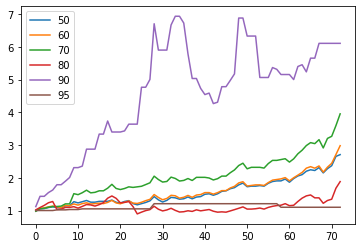

In [53]:
cum_ret_long = returns_long.iloc[:,1:]+1
cum_ret_long = cum_ret_long.cumprod()
cum_ret_long.plot()

In [54]:
returns_long['Dates'] = returns_long['Dates'].astype('str')
returns_long['Dates_M'] =returns_long['Dates'].apply(lambda x: x[0:4] + x[5:7])
returns_long['Dates_M'] = pd.to_numeric(returns_long['Dates_M'])
merged_long = returns_long.merge(ff, left_on=['Dates_M'],right_on=['Date'])

In [55]:
X = sm.add_constant(merged_long.iloc[:,9:])
y = merged_long['60']
reg = sm.OLS(y,X, fit_intercept=True).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     60   R-squared:                       0.074
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     1.350
Date:                Mon, 02 May 2022   Prob (F-statistic):              0.261
Time:                        22:44:29   Log-Likelihood:                 133.27
No. Observations:                  73   AIC:                            -256.5
Df Residuals:                      68   BIC:                            -245.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0162      0.007      2.490      0.015       0.003       0.029
Mkt-RF        -0.0004      0.001     -0.273      0.786      -0.003       0.002
SMB            0.0034      0.002      1.409      0.163      -0.001       0.008
HML           -0.0030      0.002     -1.618      0.110      -0.007       0.001
RF            -0.0225      0.039     -0.570      0.570      -0.101       0.056
==============================================================================
Omnibus:                        2.092   Durbin-Watson:                   2.065
Prob(Omnibus):                  0.351   Jarque-Bera (JB):                2.043
Skew:                          -0.390   Prob(JB):                        0.360
Kurtosis:                       2.749   Cond. No.                         36.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:
returns = pd.DataFrame()
def long_short(ub, lb):
    port_ret = []
    long = 1000000
    short = 1000000
    auc_list = []
    accuracy_list = []
    insample_accuracy_list = []
    for i in datelist:
        training = final[(final['public_date'] <= i) & (final['public_date'] >= i - datetime.timedelta(365))]
        predicting = final[(final['public_date'] <= i + datetime.timedelta(90)) & (final['public_date'] > i)]
        price = prices[(prices['date'] > i) & (prices['date'] <= i + datetime.timedelta(90))]

        X = training.iloc[:,3:]
        y = training['dir']
        clf = RandomForestClassifier().fit(X, y)

        model_result = print_confusion(model = clf, 
                              train_X = training.iloc[:,3:], train_y = training['dir'], 
                              test_X = predicting.iloc[:,3:], test_y = predicting['dir'], 
                              plots = False)
        auc_list.append(model_result['auc'])
        accuracy_list.append(model_result['test_acc'])
        insample_accuracy_list.append(model_result['train_acc'])

        temp = pd.DataFrame()
        temp['cusip'] = predicting['cusip']
        temp['Actual'] =  predicting['dir']
        temp[['Predicted_0','Predicted_1']] = clf.predict_proba(predicting.iloc[:,3:])
        temp = temp.merge(price, left_on =['cusip'],right_on= ['CUSIP'])

        initial = temp.groupby('cusip').first().reset_index()
        initial['inv'] = initial['Predicted_1'].apply(lambda x : True if x >= ub else (False if x <= lb else np.nan))
        initial.dropna(inplace=True)
        if(len(initial[initial['inv'] == True])==0 or len(initial[initial['inv'] == False])==0):
            port_ret.append(0)
            continue
        long_stocks = long/len(initial[initial['inv'] == True])
        short_stocks = short/len(initial[initial['inv'] == False])
        initial['val'] = initial['inv'].apply(lambda x: long_stocks if x else short_stocks)
        initial['shares'] = initial['val']/initial['PRC']

        end = temp.groupby('cusip').last().reset_index()
        end = end.merge(initial, on='cusip')
        end['val_final'] = end['shares'] * end['PRC_x']
        end.dropna(subset=['val_final'],inplace=True)
        port_val = abs(sum(end['val_final']))
        port_val_initial = abs(sum(initial['val']))
        ret = (port_val - port_val_initial)/port_val_initial
        port_ret.append(round(ret,2))
    
    auc = np.round(np.mean(auc_list),4)
    print(f'Threshold: {ub}-{lb}')
    print('\tAverage AUC: ',auc)
    acc = np.round(np.mean(accuracy_list),4)
    print('\tAverage Validation Accuracy: ',acc)
    insample_acc = np.round(np.mean(insample_accuracy_list),4)
    print('\tAverage Train Accuracy: ',insample_acc)
    return port_ret

In [57]:
returns = pd.DataFrame()
returns['Dates'] = datelist
returns['50'] = long_short(0.5,0.5)
returns['60'] = long_short(0.6,0.4)
returns['70'] = long_short(0.7,0.3)
returns['80'] = long_short(0.8,0.2)
returns['90'] = long_short(0.9,0.5)
returns['95'] = long_short(0.95,0.05)

Threshold: 0.5-0.5
	Average AUC:  0.5889
	Average Validation Accuracy:  0.5684
Threshold: 0.6-0.4
	Average AUC:  0.5895
	Average Validation Accuracy:  0.5677
Threshold: 0.7-0.3
	Average AUC:  0.59
	Average Validation Accuracy:  0.5666
Threshold: 0.8-0.2
	Average AUC:  0.5893
	Average Validation Accuracy:  0.5649
Threshold: 0.9-0.5
	Average AUC:  0.5896
	Average Validation Accuracy:  0.5682
Threshold: 0.95-0.05
	Average AUC:  0.5901
	Average Validation Accuracy:  0.5683


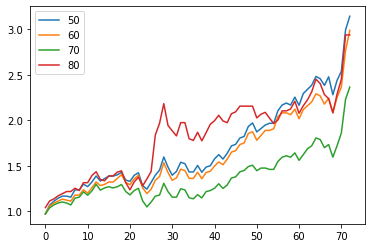

In [58]:
cum_ret = (returns.iloc[:,1:5]) + 1
cum_ret = cum_ret.cumprod()
cum_ret.plot()

In [59]:
returns['Dates'] = returns['Dates'].astype('str')
returns['Dates_M'] = returns['Dates'].apply(lambda x: x[0:4] + x[5:7])
returns['Dates_M'] = pd.to_numeric(returns['Dates_M'])

In [60]:
merged = returns.merge(ff, left_on=['Dates_M'],right_on=['Date'])
X = sm.add_constant(merged.iloc[:,9:])
y = merged['60']
reg = sm.OLS(y,X, fit_intercept=True).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     60   R-squared:                       0.080
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     1.476
Date:                Mon, 02 May 2022   Prob (F-statistic):              0.219
Time:                        22:51:20   Log-Likelihood:                 124.03
No. Observations:                  73   AIC:                            -238.1
Df Residuals:                      68   BIC:                            -226.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0165      0.007      2.230      0.029       0.002       0.031
Mkt-RF         0.0002      0.002      0.116      0.908      -0.003       0.003
SMB            0.0035      0.003      1.286      0.203      -0.002       0.009
HML           -0.0039      0.002     -1.868      0.066      -0.008       0.000
RF            -0.0261      0.045     -0.583      0.562      -0.115       0.063
==============================================================================
Omnibus:                        0.850   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.654   Jarque-Bera (JB):                0.324
Skew:                          -0.024   Prob(JB):                        0.850
Kurtosis:                       3.323   Cond. No.                         36.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""